In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

naive_bayes = GaussianNB()
y_pred = cross_val_predict(naive_bayes, X, y, cv=kf)


Accuracy =  81.42050799623706 %
Precision =  0.6777671558743327
Recall =  0.7721942658703372
F1-score =  0.7050567075739872


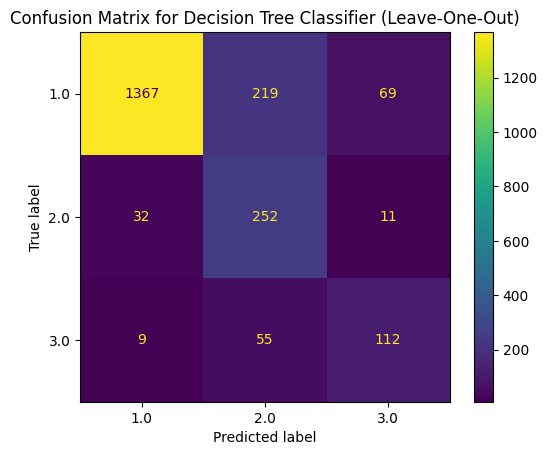

In [4]:



print("Accuracy = ", accuracy_score(y, y_pred) * 100, "%")
print("Precision = ", precision_score(y, y_pred,average='macro'))
print("Recall = ", recall_score(y, y_pred,average='macro'))
print("F1-score = ", f1_score(y, y_pred,average='macro'))

confusion = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()


In [5]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print(report)


              precision    recall  f1-score   support

         1.0       0.97      0.83      0.89      1655
         2.0       0.48      0.85      0.61       295
         3.0       0.58      0.64      0.61       176

    accuracy                           0.81      2126
   macro avg       0.68      0.77      0.71      2126
weighted avg       0.87      0.81      0.83      2126



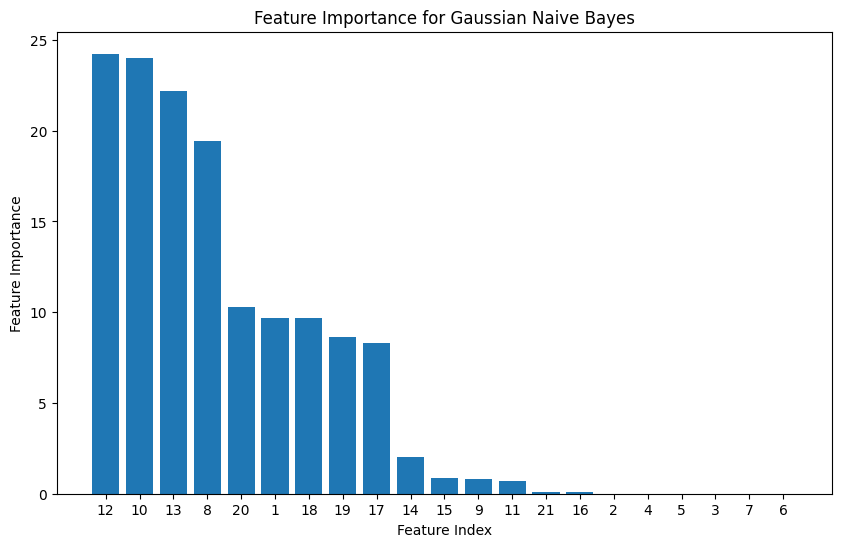

In [6]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, y are your feature matrix and target variable
gnb = GaussianNB()
gnb.fit(X, y)

# Get the mean for each feature and each class
means = gnb.theta_

# Calculate a simple measure of importance (e.g., mean difference)
feature_importance = np.abs(means[1] - means[0])

# Sort features by importance
sorted_features = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_features])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gaussian Naive Bayes')
plt.xticks(range(X.shape[1]), sorted_features + 1)  # Adding 1 to make indices start from 1
plt.show()


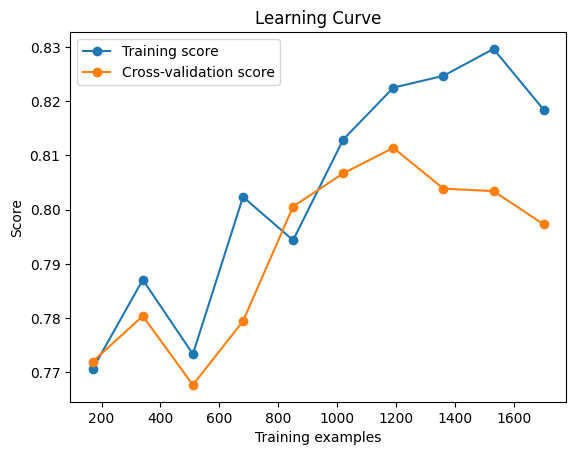

In [7]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(naive_bayes, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()